# **Import Library**

In [97]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# **Ambil Data dari Yahoo Finance**

In [98]:
#mengambil data dari yahoo finance
start_date = '2023-10-18'
end_date = '2024-10-18'
data_saham = yf.download(tickers= 'BBRI.JK', start= start_date, end= end_date, progress=False)
print(data_saham)

              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2023-10-18  5125.0  5225.0  5125.0  5150.0  4888.109375   77217600
2023-10-19  5100.0  5150.0  5000.0  5000.0  4745.737305  195831400
2023-10-20  4980.0  5100.0  4960.0  5050.0  4793.194824  173353600
2023-10-23  5000.0  5075.0  4990.0  5000.0  4745.737305   82756100
2023-10-24  5000.0  5100.0  4950.0  5100.0  4840.652344  104021500
...            ...     ...     ...     ...          ...        ...
2024-10-10  4920.0  4970.0  4860.0  4860.0  4860.000000  226564700
2024-10-11  4910.0  4940.0  4890.0  4900.0  4900.000000  104875300
2024-10-14  4900.0  4930.0  4870.0  4900.0  4900.000000  125414400
2024-10-15  4930.0  4990.0  4920.0  4920.0  4920.000000  142372200
2024-10-16  4950.0  4970.0  4920.0  4950.0  4950.000000  118014300

[238 rows x 6 columns]


# **Plot Grafik Saham**

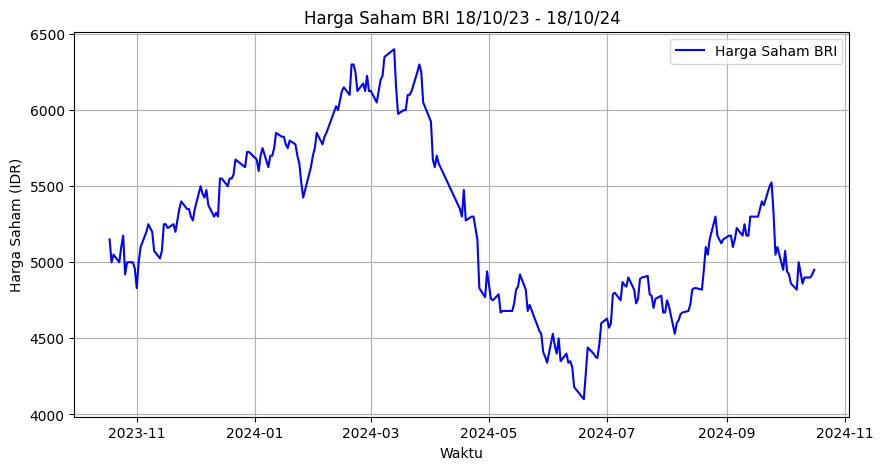

In [99]:
#plot grafik saham
plt.figure(figsize=(10, 5))
plt.plot(data_saham['Close'], label='Harga Saham BRI', color='blue')
plt.title('Harga Saham BRI 18/10/23 - 18/10/24')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham (IDR)')
plt.legend()
plt.grid()
plt.show()

# **Menghitung Returns Harian**

In [100]:
#menghitung returns harian
#returns = [s(t + delta_t)-s(t)]/s(t)

harga_saham = data_saham["Close"]

returns_harian = (harga_saham.shift(-1) - harga_saham) / harga_saham
returns_harian = returns_harian.dropna()
print(returns_harian)

Date
2023-10-18   -0.029126
2023-10-19    0.010000
2023-10-20   -0.009901
2023-10-23    0.020000
2023-10-24    0.014706
                ...   
2024-10-09   -0.014199
2024-10-10    0.008230
2024-10-11    0.000000
2024-10-14    0.004082
2024-10-15    0.006098
Name: Close, Length: 237, dtype: float64


# **Menghitung Returns Logarithmic**

In [101]:
#menghitung returns logarithmic
#returns = ln(s(t + delta_t)/s(t))

returns_saham_logarithmic = np.log(harga_saham.shift(-1)/harga_saham)
returns_saham_logarithmic = returns_saham_logarithmic.dropna()
print(returns_saham_logarithmic)

Date
2023-10-18   -0.029559
2023-10-19    0.009950
2023-10-20   -0.009950
2023-10-23    0.019803
2023-10-24    0.014599
                ...   
2024-10-09   -0.014301
2024-10-10    0.008197
2024-10-11    0.000000
2024-10-14    0.004073
2024-10-15    0.006079
Name: Close, Length: 237, dtype: float64


# **Diagram Pencar Returns Harian**

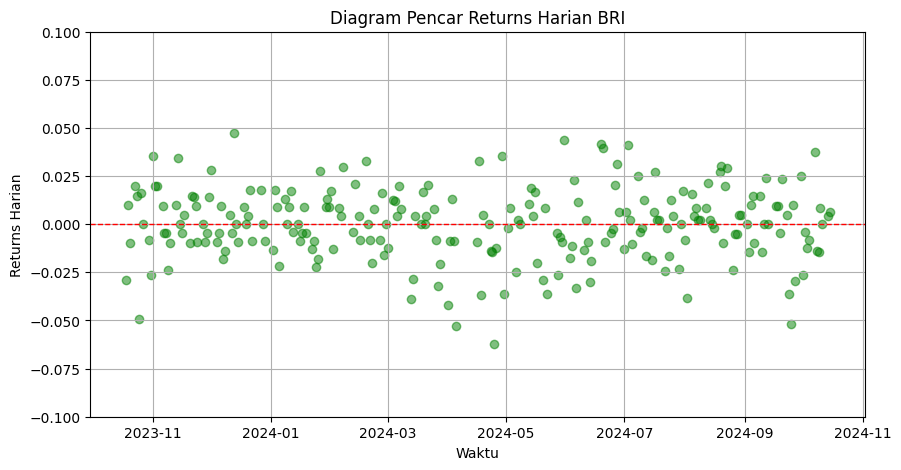

In [102]:
#membuat diagram pencar returns harian BRI
plt.figure(figsize=(10, 5))
plt.scatter(returns_harian.index, returns_harian, color='green', alpha=0.5)
plt.title('Diagram Pencar Returns Harian BRI')
plt.xlabel('Waktu')
plt.ylabel('Returns Harian')
plt.grid()
plt.axhline(0, color='red', linewidth=1, linestyle='--')
plt.ylim(-0.1, 0.1)
plt.show()

# **Diagram Pencar Returns Logarithmic**

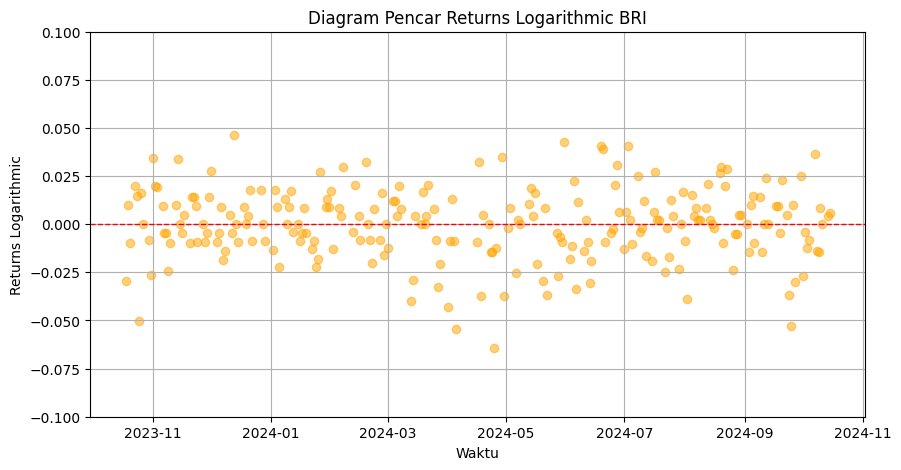

In [103]:
#membuat diagram pencar returns logarithmic BRI
plt.figure(figsize=(10, 5))
plt.scatter(returns_saham_logarithmic.index, returns_saham_logarithmic, color='orange', alpha=0.5)
plt.title('Diagram Pencar Returns Logarithmic BRI')
plt.xlabel('Waktu')
plt.ylabel('Returns Logarithmic')
plt.grid()
plt.axhline(0, color='red', linewidth=1, linestyle='--')
plt.ylim(-0.1, 0.1)
plt.show()

# **Histogram Returns Harian dan Returns Logarithmic**

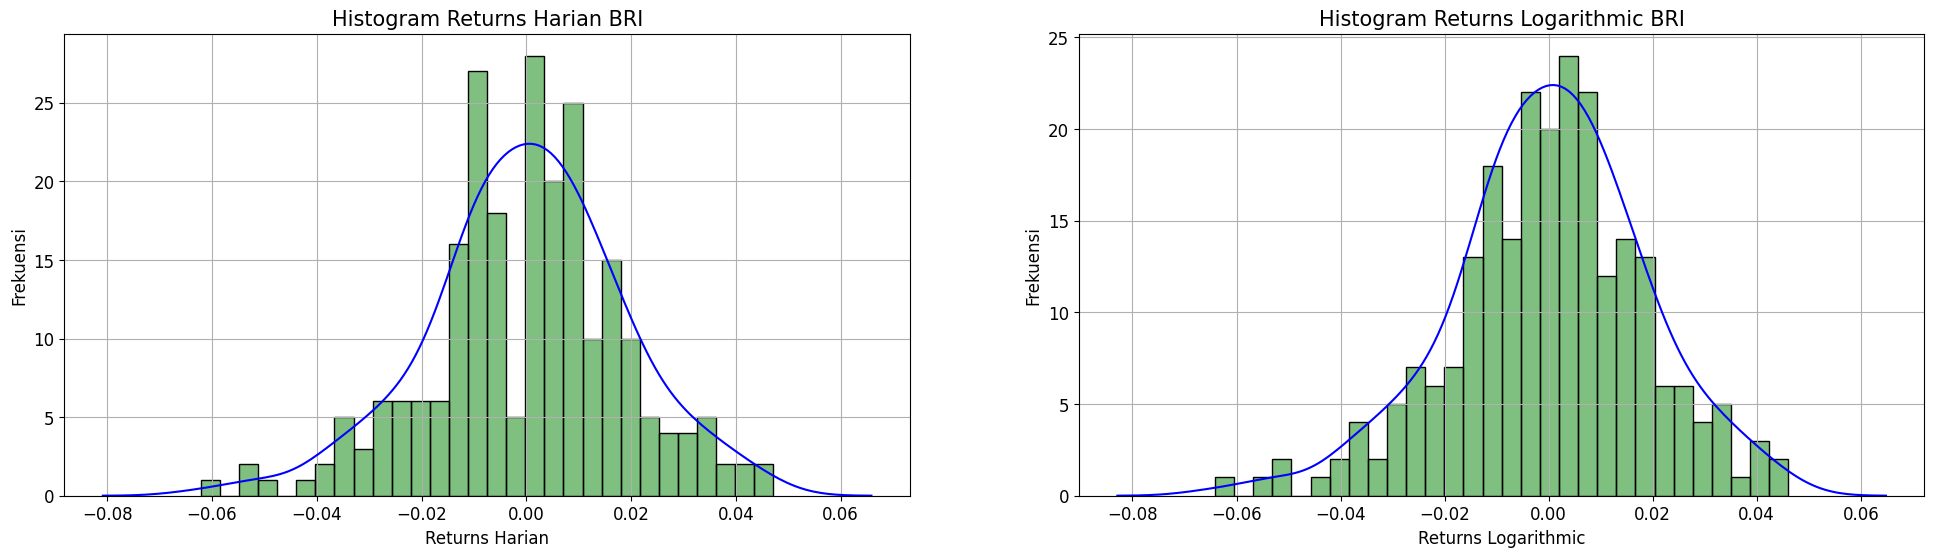

In [104]:
#membuat histrogram returns harian dan returns logarithmic BRI
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#plot histrogram returns harian
sns.histplot(returns_harian, bins=30, color='green', alpha=0.5, ax=ax[0])
sns.kdeplot(returns_harian, color='blue', ax=ax[0])
ax[0].set_title("Histogram Returns Harian BRI", loc="center", fontsize=15)
ax[0].set_xlabel("Returns Harian", fontsize=12)
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].tick_params(axis ='x', labelsize=12)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].grid()

#plot histogram returns logarithmic
sns.histplot(returns_saham_logarithmic, bins=30, color='green', alpha=0.5, ax=ax[1])
sns.kdeplot(returns_saham_logarithmic, color='blue', ax=ax[1])
ax[1].set_title("Histogram Returns Logarithmic BRI", loc="center", fontsize=15)
ax[1].set_xlabel("Returns Logarithmic", fontsize=12)
ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].tick_params(axis ='x', labelsize=12)
ax[1].tick_params(axis ='y', labelsize=12)
ax[1].grid()

plt.show()

# **Uji Normalitas Kolmogorov-Smirnov**

In [105]:
# Kolmogorov-Smirnov Test

# KS_statistic : D = max|F(Z)-F(x)|
ks_statistic, p_value = stats.kstest(returns_saham_logarithmic, 'norm', args=(returns_saham_logarithmic.mean(), returns_saham_logarithmic.std()))

# print nilai ks_statistic dan p_value
print("KS Statistic: ", ks_statistic)
print("P-Value: ", p_value)
print()

# membuat kesimpulan hasil test
alpha = 0.05         # tingkat kepercayaan 5%

if p_value < alpha:
    print("Returns saham tidak berdistribusi normal")
else:
    print("Returns saham berdistribusi normal")

KS Statistic:  0.06373744111471247
P-Value:  0.2787058109362528

Returns saham berdistribusi normal


# **Normal P-Plot Returns Logarithmic**

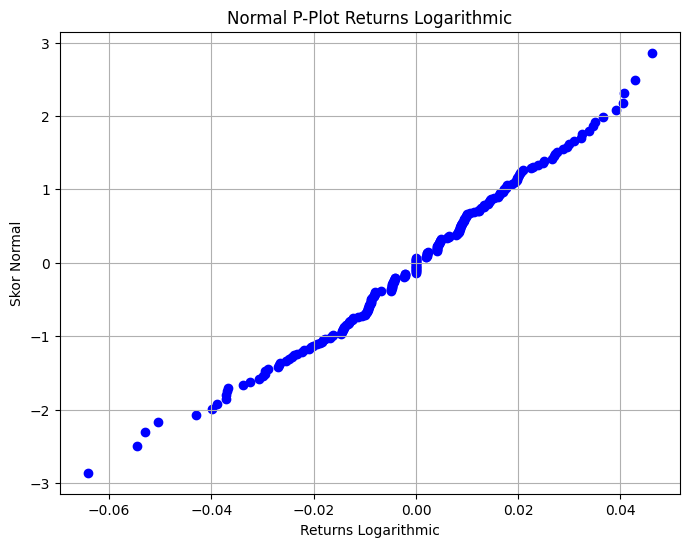

In [106]:
# Normal P-Plot
plt.figure(figsize=(8, 6))

# menghitung skor normal
normal_scores = stats.norm.ppf((np.arange(1, len(returns_saham_logarithmic) + 1) - 0.5) / len(returns_saham_logarithmic))

# plot grafik
plt.scatter(returns_saham_logarithmic.sort_values(), normal_scores, color='blue', marker='o')
plt.title("Normal P-Plot Returns Logarithmic")
plt.xlabel("Returns Logarithmic")
plt.ylabel("Skor Normal")
plt.grid()
plt.show()

# **Menghitung Drift dan Volatilitas**

In [107]:
#menentukan nilai drift (mu) dan volatilitas (sigma)

#parameters
delta_t = 1  #digunakan 1 karena data harian

#menentukan variance dari returns logarithmic
variance = returns_saham_logarithmic.var()

#menentukan rata-rata dari returns logarithmic
R_mean = returns_saham_logarithmic.mean()

#menentukan volatilitas
volatilitas = (np.sqrt(variance) / (delta_t ** 0.5))

#menentukan drift
drift = (R_mean / delta_t) + (volatilitas**2 / 2)

#menampilkan output
print("Nilai Volatilitas : {:.10f}".format(volatilitas))
print("Nilai drift : {:.10f}".format(drift))

Nilai Volatilitas : 0.0186584695
Nilai drift : 0.0000069421


# **Simulasi Lintasan Harga Saham (Implementasi Monte Carlo)**

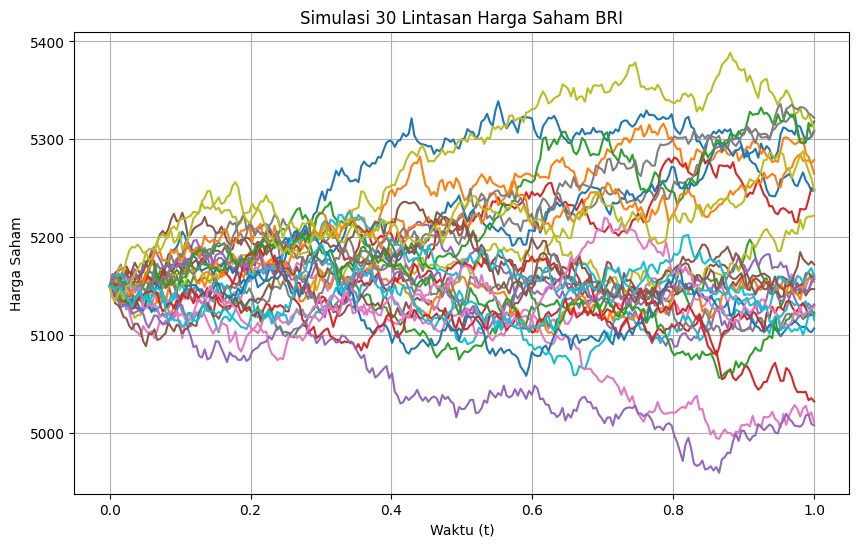

In [108]:
#menentukan simulasi lintasan harga saham

#parameters
S0 = harga_saham.loc[start_date]       # harga awal saham
mu = drift                             # drift
sigma = volatilitas                    # volatilitas
T = 1                                  # total waktu (dalam tahun)
L = 252                                # number of time steps (daily)
M = 30                                 # total simulasi

#time step
dt = T / L
t = np.linspace(0, T, L + 1)

#menentukan random normal values (implementasi metode monte carlo)
random_values = np.random.normal(0, 1, (M, L))

#menghitung harga saham
saham = S0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_values, axis=1))

#menambahkan harga saham awal
saham = np.hstack((S0 * np.ones((M, 1)), saham))

#plot grafik simulasi lintasan harga saham
plt.figure(figsize=(10, 6))
plt.plot(t, saham.T)
plt.title("Simulasi {} Lintasan Harga Saham BRI".format(M))
plt.xlabel("Waktu (t)")
plt.ylabel("Harga Saham")
plt.grid()
plt.show()